### Overview

Here is a quick overview of some statistical analysis within Python including:
1. Plotting x and y coordinates
2. Calculating pearson coefficient 
3. Running an OLS regression
4. Plotting the line of best fit from regression results 
5. Predicting y-values based on OLS model parameters


### Modules

As usual, numpy and matplotlib are must haves. Numpy is used within the process to calculate the pearson correlation coefficient, as well as allow us to apply the OLS model parameters to the entire list of x-values. Statsmodels is used to perform the OLS regression and provide a plethora of information around the model. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



#### Scatter plot

The model is initiated by specifying the x(independent) and y(dependent) variables and creating a simple scatter plot to observe the baseline data points.

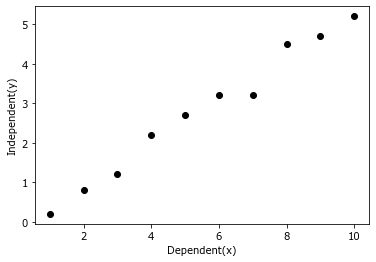

In [21]:
x = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y = (0.2,0.8,1.2,2.2,2.7,3.2,3.2,4.5,4.7,5.2)

plt.xlabel('Dependent(x)') 
plt.ylabel('Independent(y)')

plt.plot(x, y, 'o', color='black');

#### Correlation Coefficient

The pearson correlation coefficient can easily by found thanks to Numpy's corrcoef(function). Pearson correlation, measured in the range of -1 to 1, is used to determent the strength and direction of the correlation between two variables.

In [22]:
np.corrcoef(x, y)[0, 1]

0.9913407550176283

#### Linear Regression (OLS)

In [23]:
X = sm.add_constant(x)                    # specify constant 
model = sm.OLS(y, X.astype(float)).fit()  # fit model(output, input)
predictions = model.predict(X)            # predict based on fit model
model.summary()                           # print model results

C:\Users\Matt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     455.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           2.43e-08
Time:                        08:47:00   Log-Likelihood:                 1.2832
No. Observations:                  10   AIC:                             1.434
Df Residuals:                       8   BIC:                             2.039
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2867      0.163     -1.764      0.116      -0.662       0.088
x1             0.5594      0.026     21.353      0.000       0.499       0.620
==============================================================================
Omnibus:                        0.411   Durbin-Watson:                   2.699
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.322
Skew:                          -0.343   Prob(JB):                        0.851
Kurtosis:                       2.450   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Line of Best Fit
model.params is used to extract the constant and coefficient from the statsmodes output. The coefficient is converted to a numpy array so it can be multiplied by the x-coordinates for the line of best fit.

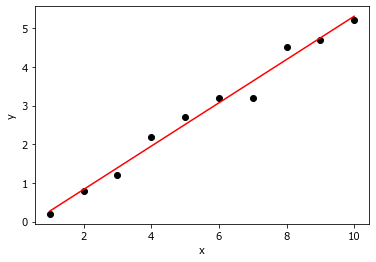

In [24]:
constant = model.params[0]      # declare constant from statsmodels output 
coefficient = model.params[1]   # declare coefficient from statsmodels output

plt.scatter(x, y, color = 'black', marker = "o") 
  
y_fit = constant + np.asarray(coefficient)*x  # convert coefficient to array
  
plt.plot(x, y_fit, color = 'r') 
  
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.show() 

#### Predict y values

In [25]:
print(f'Predicted Value: {coefficient*int(input()) + constant}')

11
Predicted Value: 5.866666666666668
